# Project Name: Customer Retention Project

# Problem Statement:

Customer Satisfaction has emerged as one of the most important factors that guarantee success of online stores. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.
    
We are required to apply our analyticsl skills to provide detailed findings and data analysis.
    

# Import Libraries

In [1]:
#data processing
import pandas as pd
import numpy as np

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

#machine learning algorithms
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from scipy.stats import zscore

import warnings 
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df=pd.read_excel('detailed dataset.xlsx')

In [3]:
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

In [4]:
df.shape

(269, 71)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [6]:
#loading encoded dataset
encoded=pd.read_excel('encodeddataset.xlsx')

In [7]:
encoded.head()

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   
3                      0                    2   
4                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   
3                                           4   
4                                           3   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       
3                                                  1                       
4                                                  2                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          
3                                                  3          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          
3                                                  1          
4                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      
2                                                  4                                                      
3                                                  4                                                      
4                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        
2                                                  2                                                        
3                                                  3                                                        
4                                                  3                                                        

   11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                                  1                                                                                  
1         

In [36]:
encoded.shape

(269, 71)

In [37]:
encoded.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [11]:
df.isnull().sum()  #checking null values

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

Text(0.5, 1.0, 'Null Values')

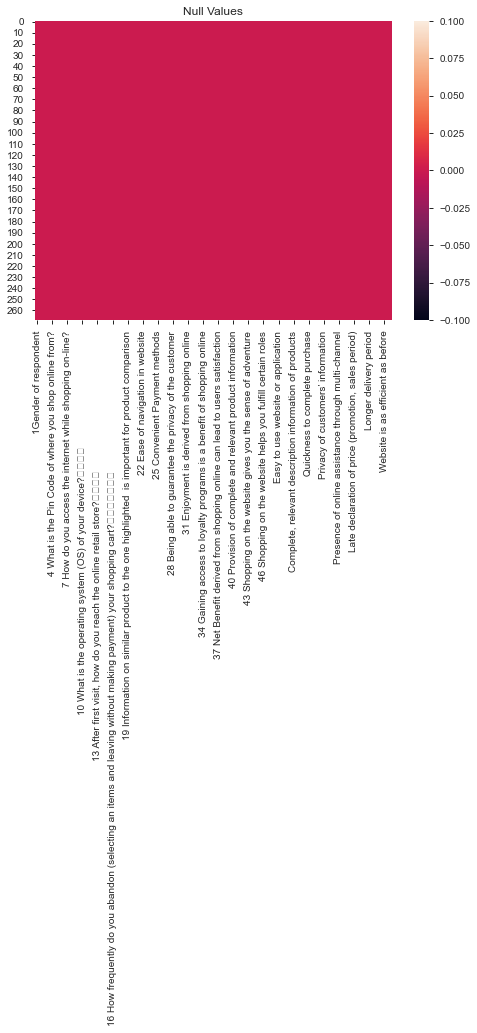

In [16]:
#checking null values in map

sns.heatmap(df.isnull())
plt.title("Null Values")

In [17]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

# EDA

Univariate Analysis

Text(0.5, 1.0, 'Gender Profile')

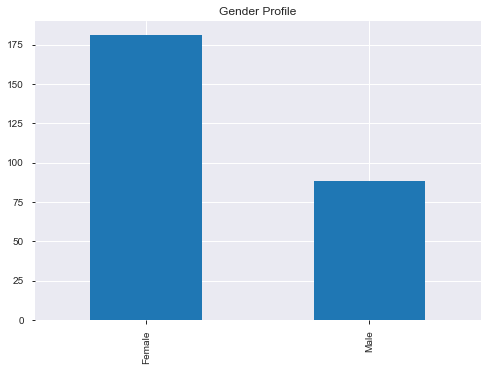

In [21]:
#lets begin by looking at the gender distribution of the population
df['1Gender of respondent'].value_counts().plot.bar()
plt.title("Gender Profile")

We see that 67% of the respondents are females whereas only 33% of the respondents surveyed were males.

This could be an indication that women have a greater inclination towards online shopping than did men.

Text(0.5, 1.0, 'Age Profile')

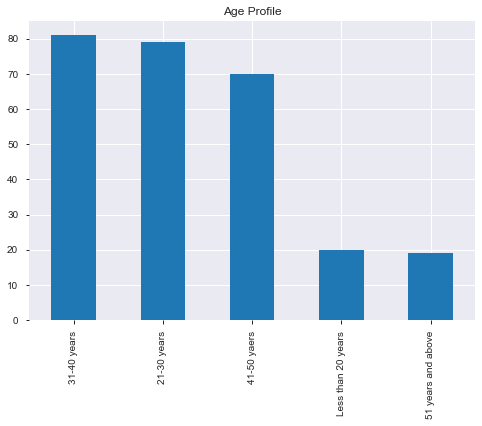

In [22]:
#Next let's look at the age profile of the surveyed population
df['2 How old are you? '].value_counts().plot.bar()
plt.title("Age Profile")

Majority (~80%) of the surveyed shoppers were aged between 21-50 years with equal distribution between each of the 3 age ranges.
People aged less than 20 years and those above 51 years formed about 7% of this survey.

We can deduce from this that people aged 21-50 years exhibit a tendency to shop online more since they are probably employed with a steady monetary income and therfore, the purchasing power.

People below 20 years would be expected to be focused in their education, with little to no monetary income and therefore, no purchasing power.

Those above 51 years would be probably managing debts or saving up for future plans or retirement in what would likely be their final decade of a typical corporate life.

Text(0.5, 1.0, 'City Profile')

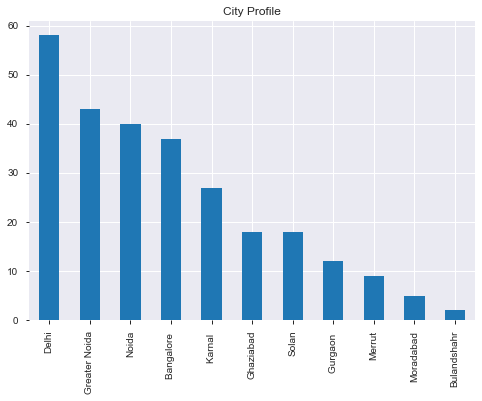

In [24]:
#Next let's look at the city of the surveyed population
df['3 Which city do you shop online from?'].value_counts().plot.bar()
plt.title("City Profile")

Delhi tops the list in this ecommerce survey followed by Greater Noida and Noida, Bangalore etc.

We have a higher urban population in this survey of ecommerce consumers.

As compared to rural areas, People in cities have :
    1. higher exposure to product marketing campaigns, 
    2. higher accessibility, in terms of ease of delivery and returns from and to Ecommerce platforms
    3. higher disposable income and hence higher purchasing power
    4. higher standard of living, and need to spend in order to maintain that
    5. lesser time and hence, find online shopping convenient and hassle free instead of visiting a typical brick and mortar store
    6. the plethora of options that online platforms can offer for a particular product

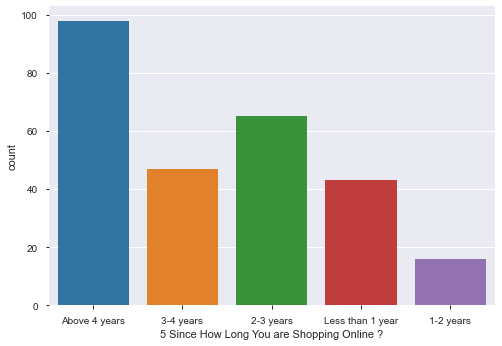

In [41]:
#No of years of shopping online
sns.countplot(df["5 Since How Long You are Shopping Online ?"])

We see that 36% of the total shoppers have been shopping online for more than 4 years.

Thus far, we have seen urban women in the demography of 21-50 years shopping since 4+ years. This would constitute a profitable target group for ecommerce platforms to focus their customer activation and retention policies.

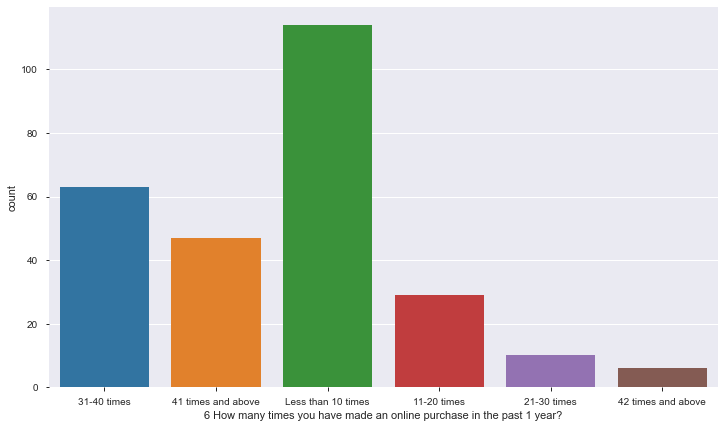

In [44]:
#No of years of shopping online
plt.figure(figsize=(12,7))
sns.countplot(df["6 How many times you have made an online purchase in the past 1 year?"])

We see that purchases in a year are typically less than 10. Though we have a reasonable number of shoppers making 31-40 purchases in a year.

In [45]:
#Internet accesibility
sns.countplot(df["7 How do you access the internet while shopping on-line?"])

We see that almost 70% of shoppers use mobile internet, which implies that at least 70% shoppers use their mobile phones (or laptops?) to make online purchases.

Ecommerce platforms should focus on designing their mobile apps and mobile websites to make it optimal, user-friendly and deliver as good an experience as their website versions would.

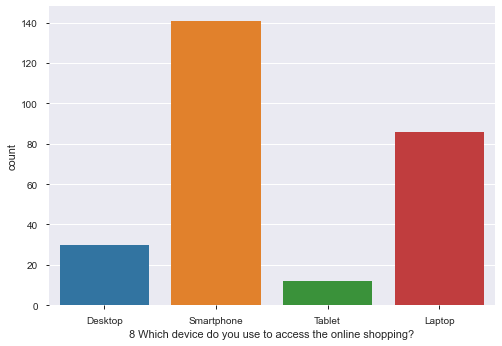

In [46]:
#Internet accesibility
sns.countplot(df["8 Which device do you use to access the online shopping?"])

About 50% shoppers use their mobile phones to seal the deals.

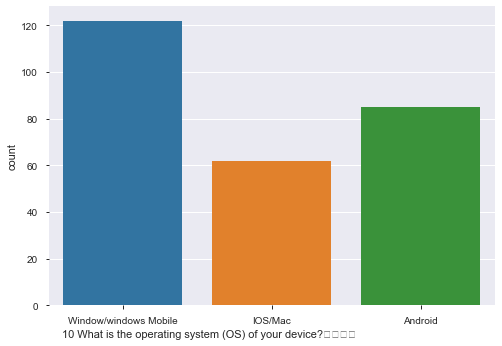

In [48]:
#Mobile device
sns.countplot(df["10 What is the operating system (OS) of your device?				                                          "])

45% shoppers were Windows users. Companies could benefit by focusing on optimising user experience for Windows OS.

In [49]:
#Browser usage
sns.countplot(df["11 What browser do you run on your device to access the website?			                                                          "])

We have a significant number of Chrome shoppers.

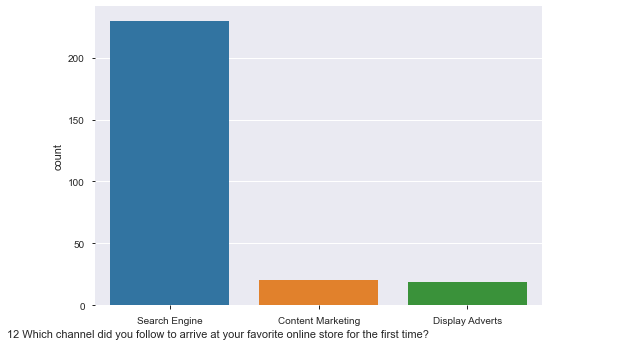

In [50]:
#Channel
sns.countplot(df["12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   "])

86% People made their first store visit from a search engine.

Ecommerce platforms should also focus on Search Engine Optimization (SEO) to ensure the search engines direct potential customers to their page.

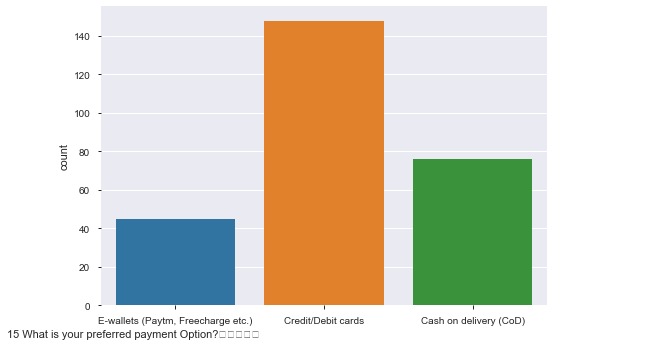

In [51]:
#Payment option
sns.countplot(df["15 What is your preferred payment Option?					                                                                                                                               "])

55% shoppers preferred using Credit and Debit Cards to complete their online purchases.

Ecom platforms should make sure they include cards from most banking partners to facilitate consumers.

In [53]:
#cart abandon
sns.countplot(df["16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                   "])

64% shoppers admit to abandoning their cart sometimes!

The reasons for this needs to be investigated further and the causes should be fixed so that customers would not abandon their cart.

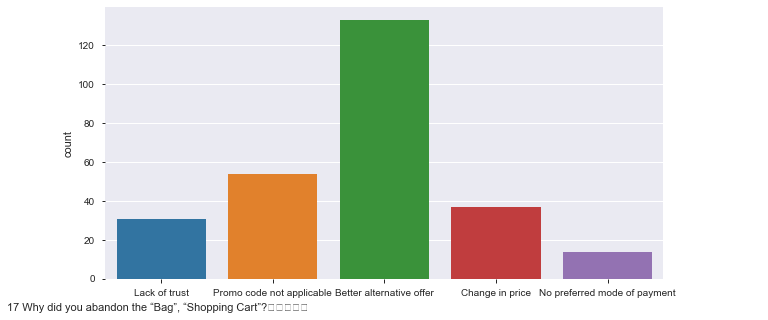

In [57]:
#why abandon
plt.figure(figsize=(10,5))
sns.countplot(df["17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                       "])

49% shoppers found a better alternative offer due to which they abandoned their cart.

This shows people do their research, when it comes to online shopping, well. If they tend to find a more competitive price for the same product elsewhere, they will go for it.
Hence, e-retailers should be mindful of the prices they set to be in line with the market.

Multi variate analysis

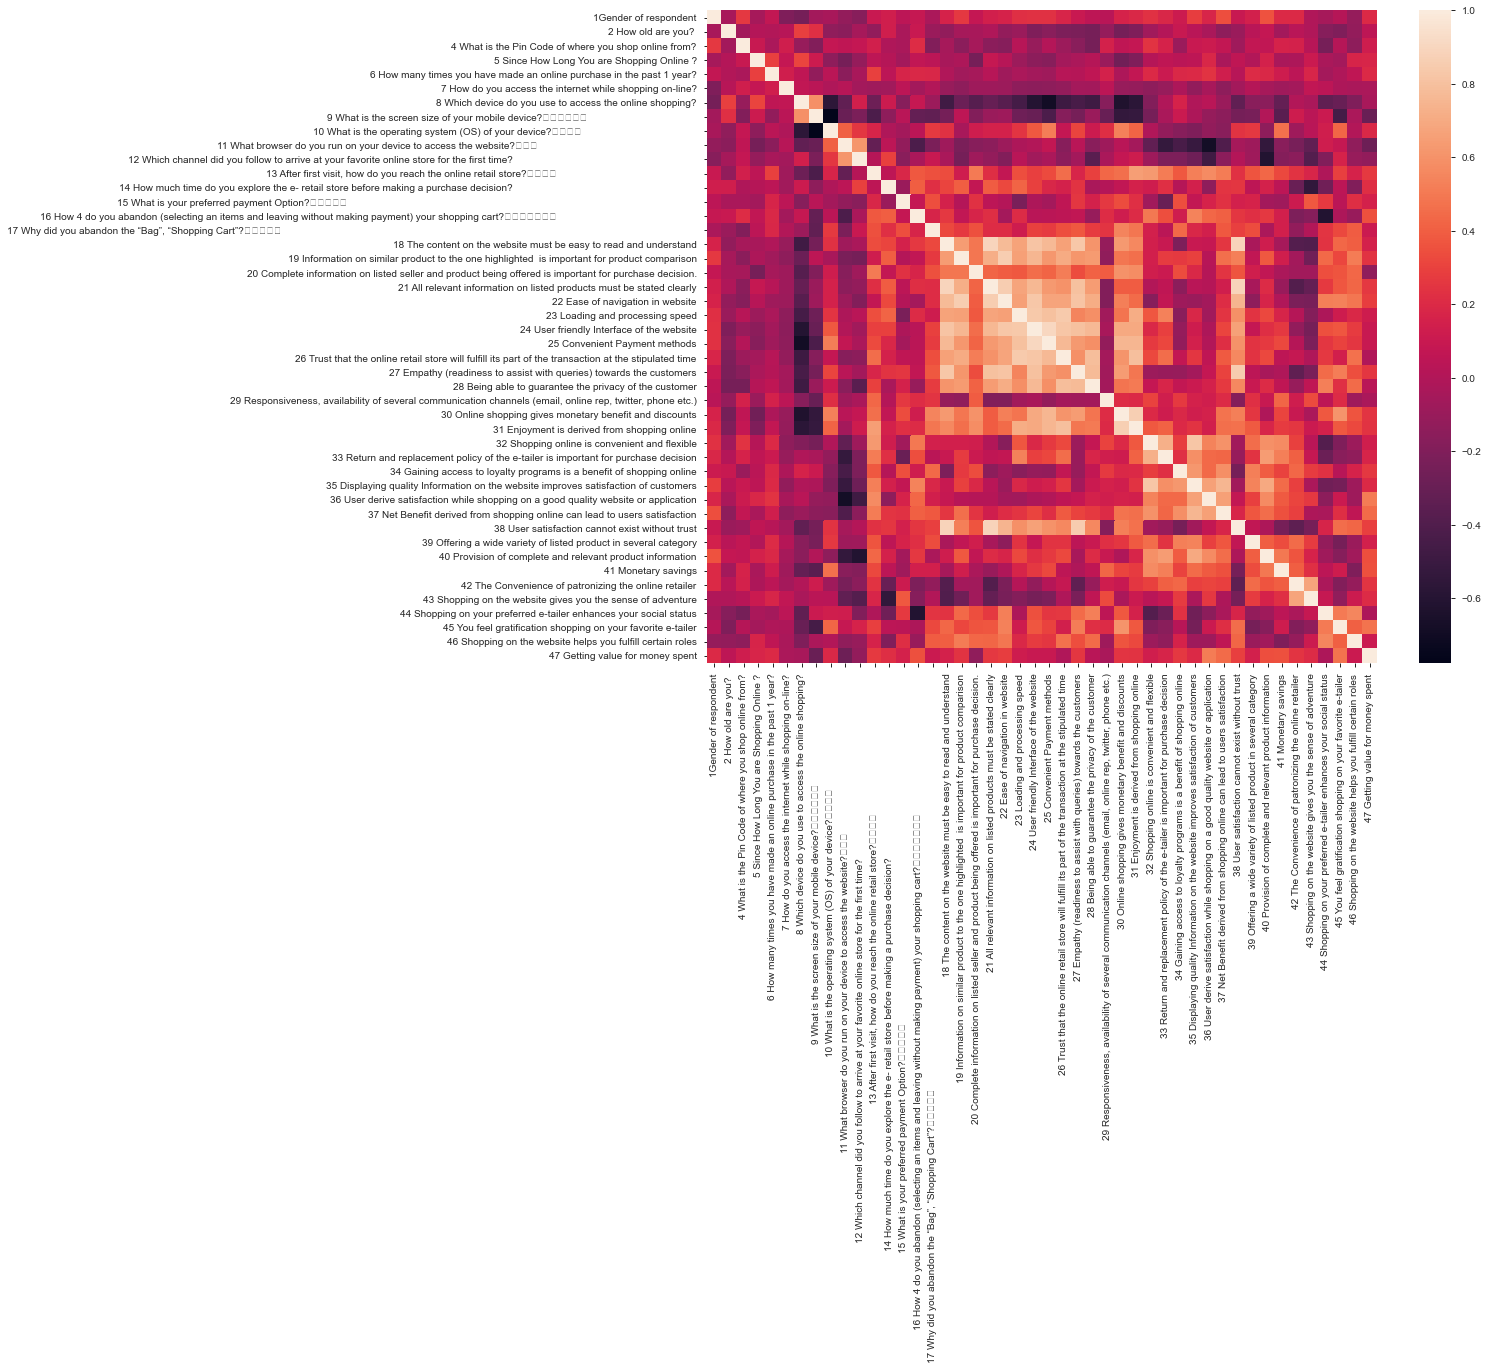

In [58]:
#correlation of all features
plt.subplots(figsize=(15,12))
sns.heatmap(encoded.corr())

Bi Variate Analysis

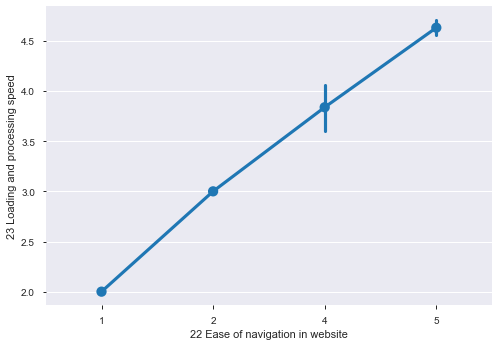

In [59]:
sns.pointplot(encoded["22 Ease of navigation in website"],encoded["23 Loading and processing speed"])

Indicates customers value navigation ease as well as processing speed of the website which enhances their shopping experience.

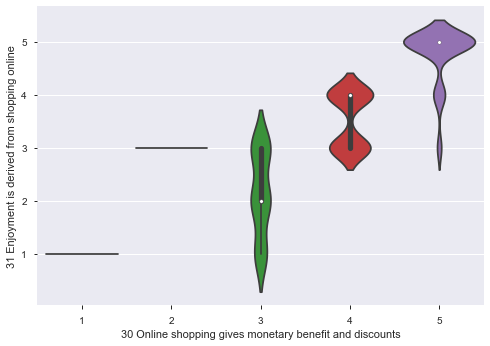

In [60]:
sns.violinplot(encoded["30 Online shopping gives monetary benefit and discounts"],encoded["31 Enjoyment is derived from shopping online"])

This violin plot indicates that customers firmly believe that online shopping provides monetary benefit in the form of discounts and that enjoyment was derived through the process of online shopping.

Eretailers could benefit through luring customers by way of attractive discounts and also making the shopping experience interesting and enjoyable.

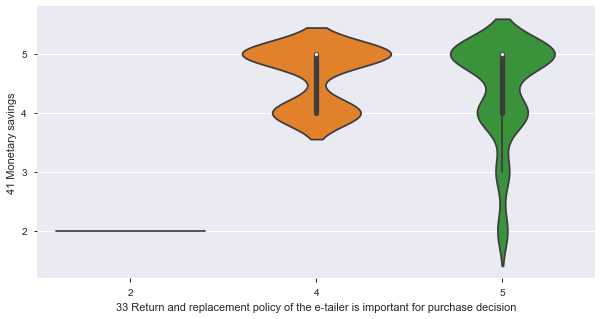

In [9]:
plt.figure(figsize=(10,5))
sns.violinplot(encoded["33 Return and replacement policy of the e-tailer is important for purchase decision"],encoded["41 Monetary savings"])

People strongly believe that return policies and monetary savings were important factors to consider before making online purchases.

Since these are not like your local store where you can go back and demand a replacement in case of a faulty/defective purchase; ecommerce retailers need to ensure they build their customers trust by putting in place good replacement and return policies while also ensuring that quality standards of products are being maintained.

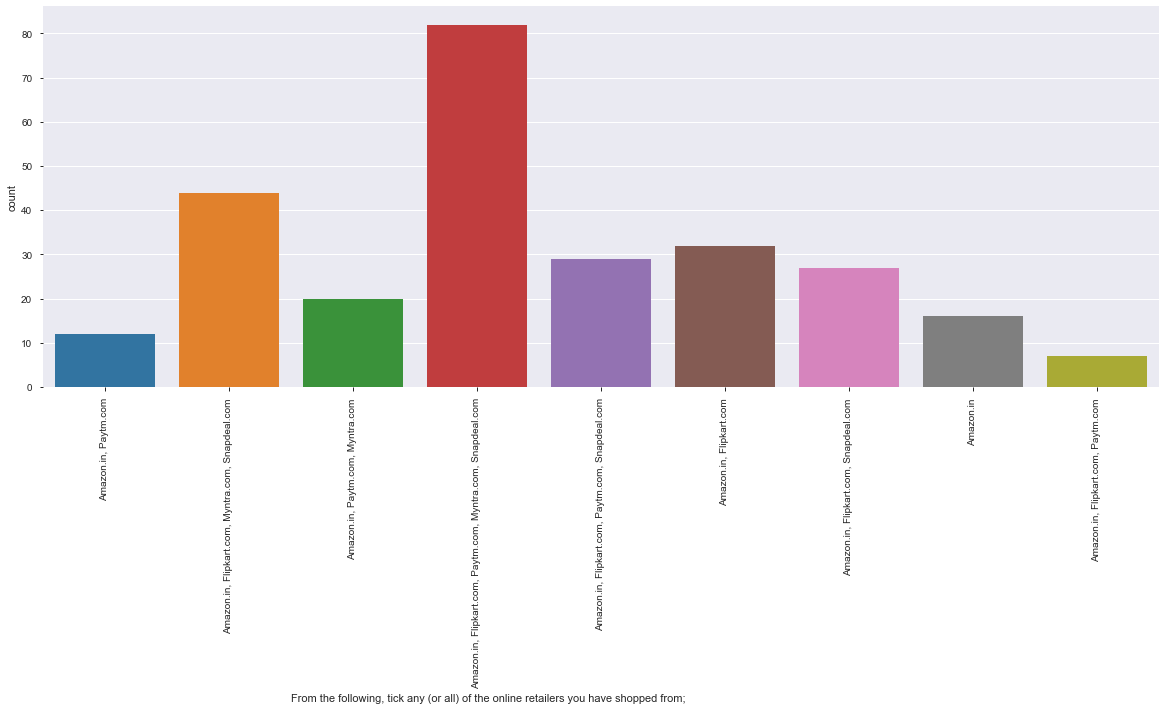

In [13]:
#why abandon
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot(df["From the following, tick any (or all) of the online retailers you have shopped from;                                                                           "])

Majority of the shoppers use all platforms- Amazon, Flipkart, Myntra, Snapdeal and Paytm.

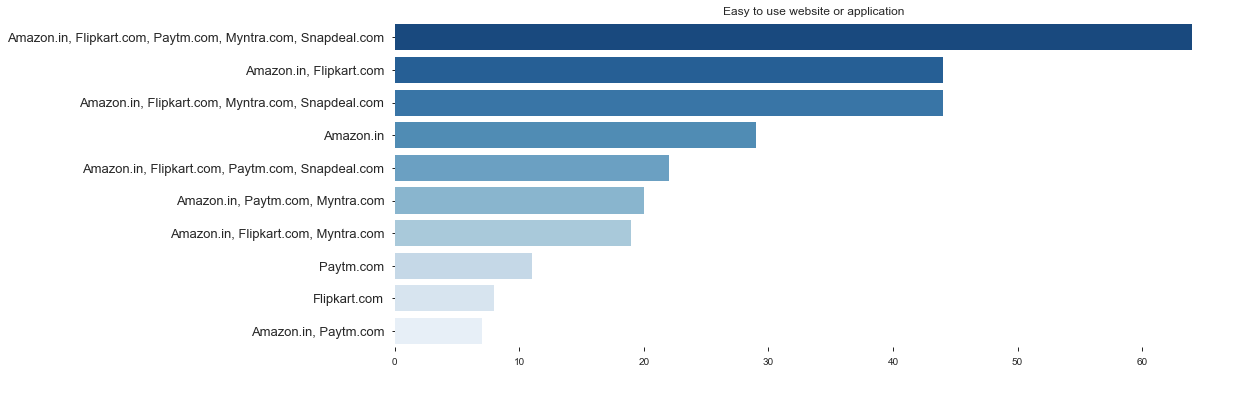

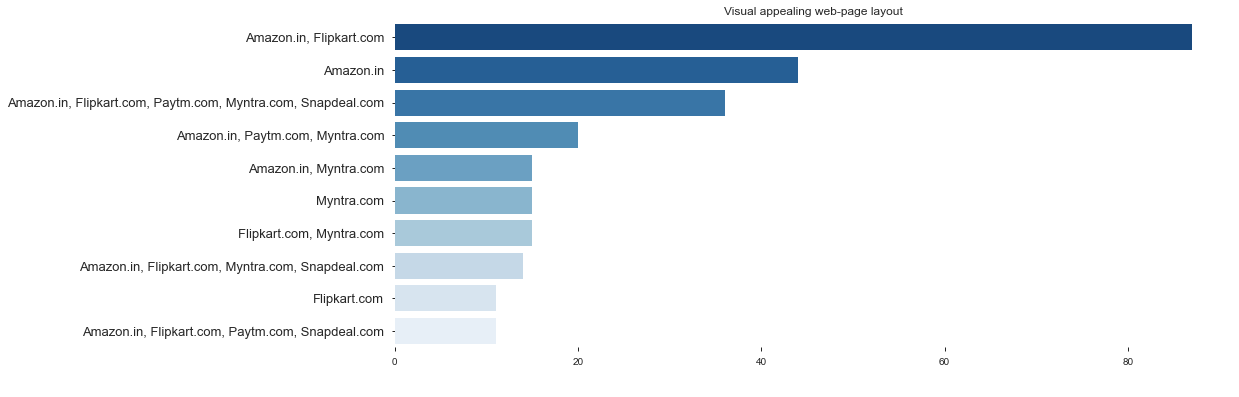

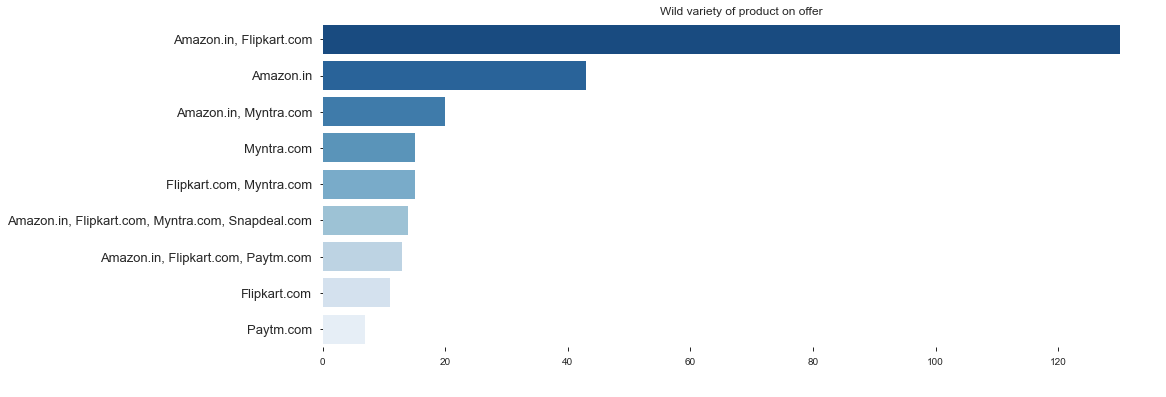

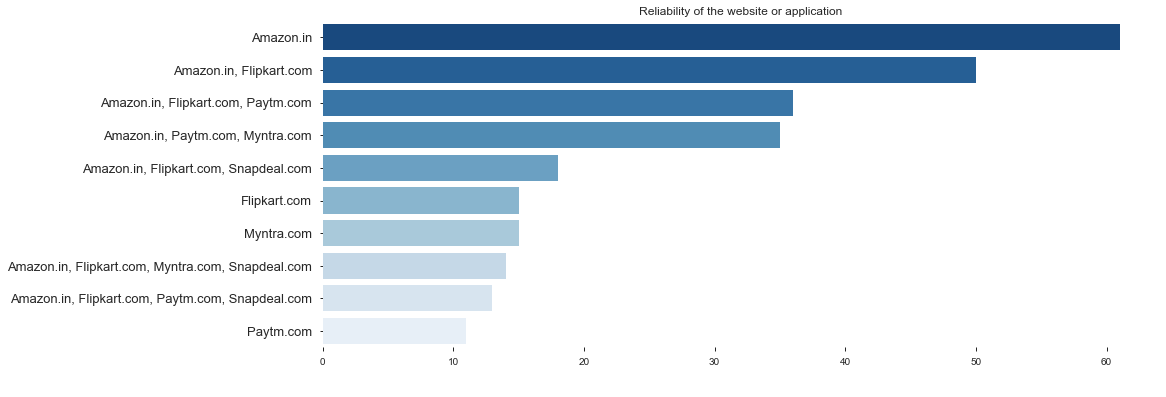

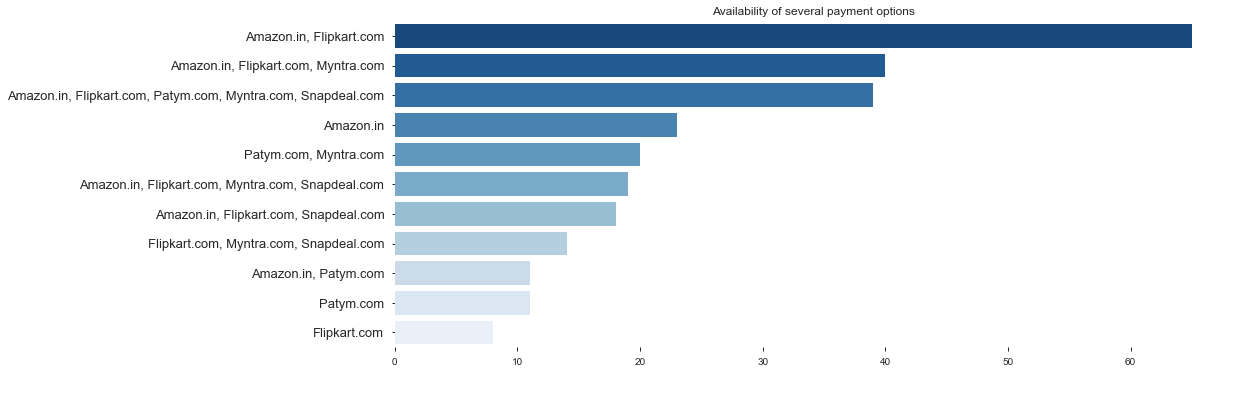

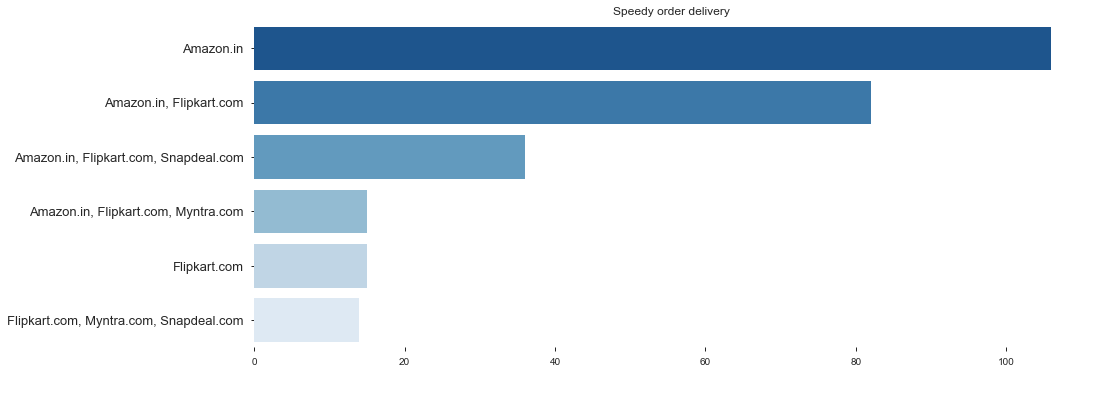

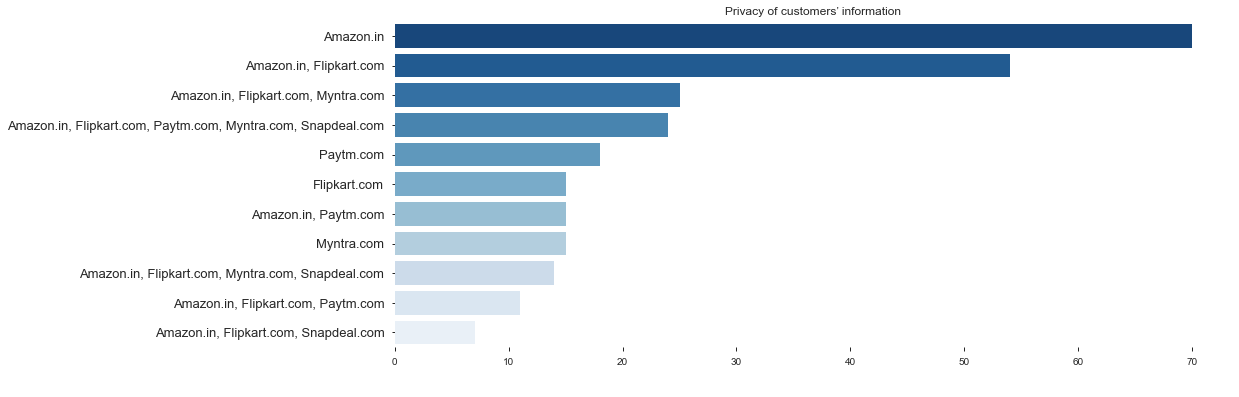

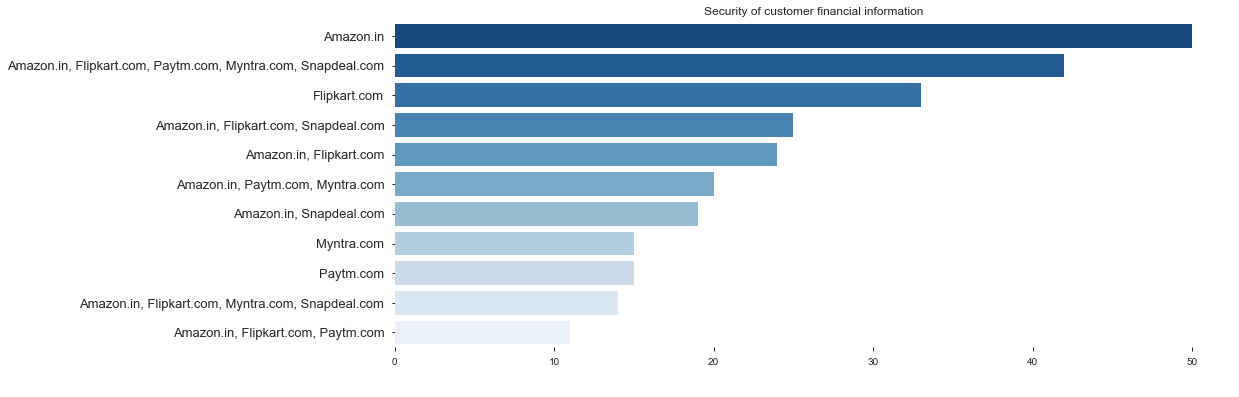

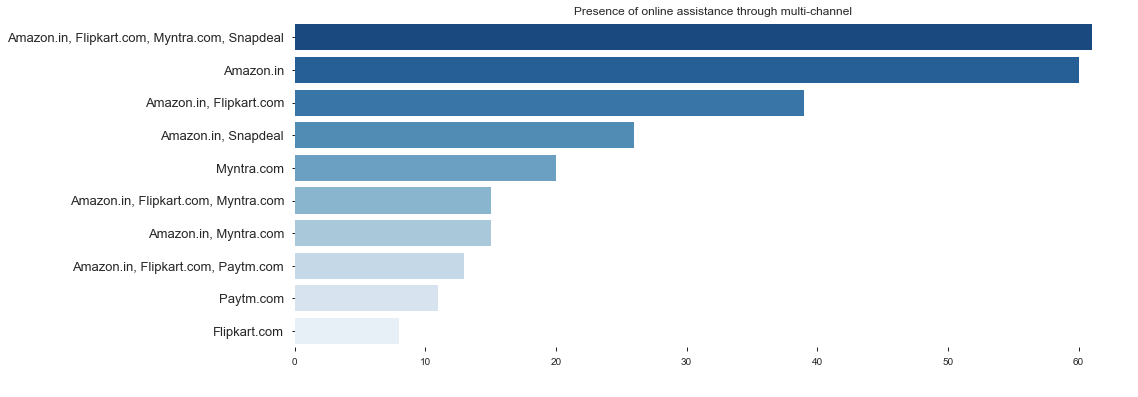

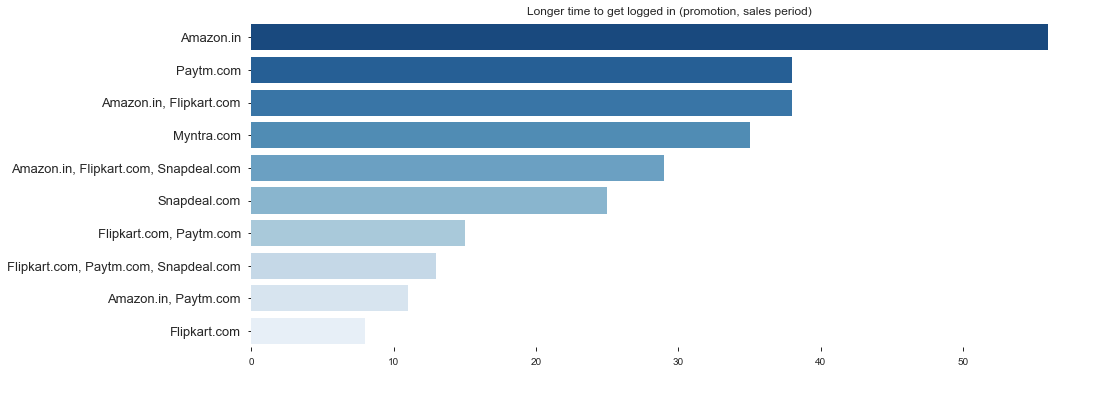

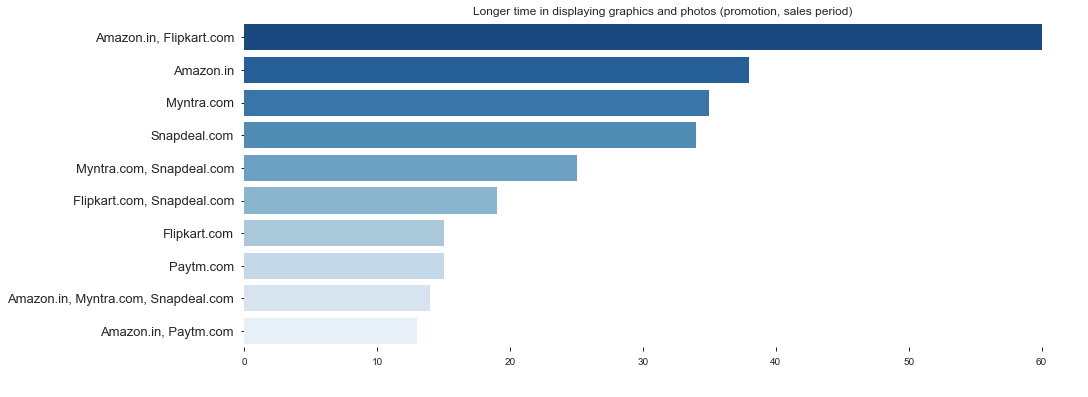

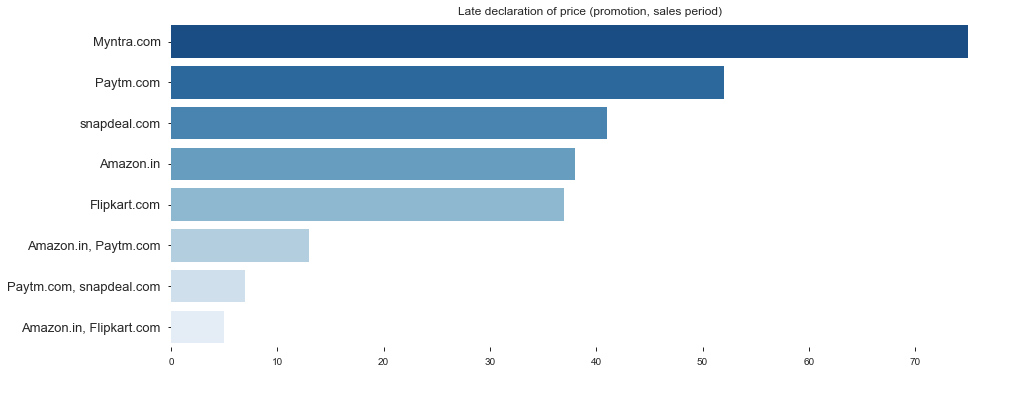

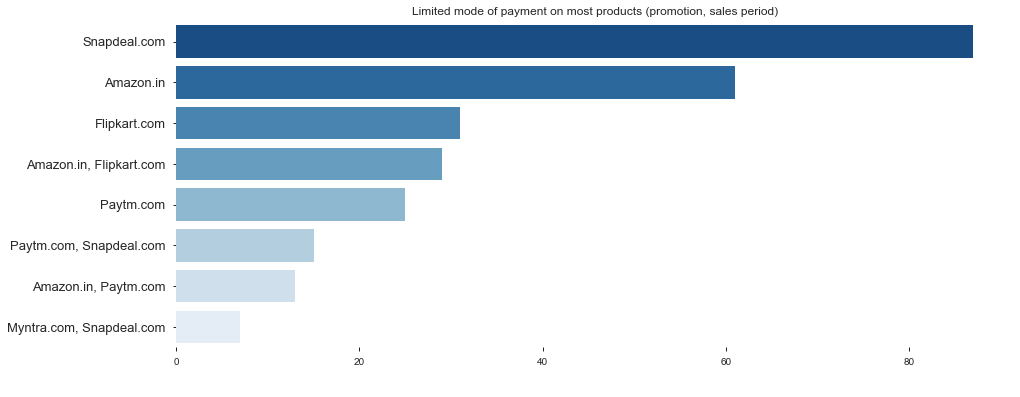

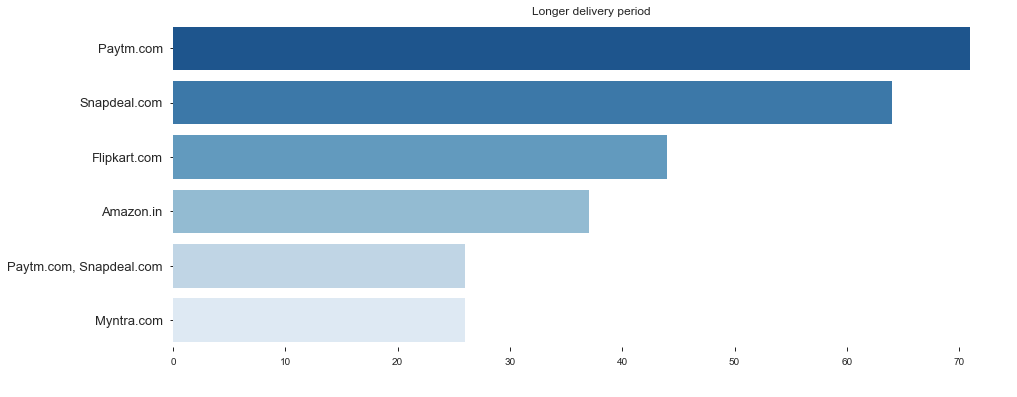

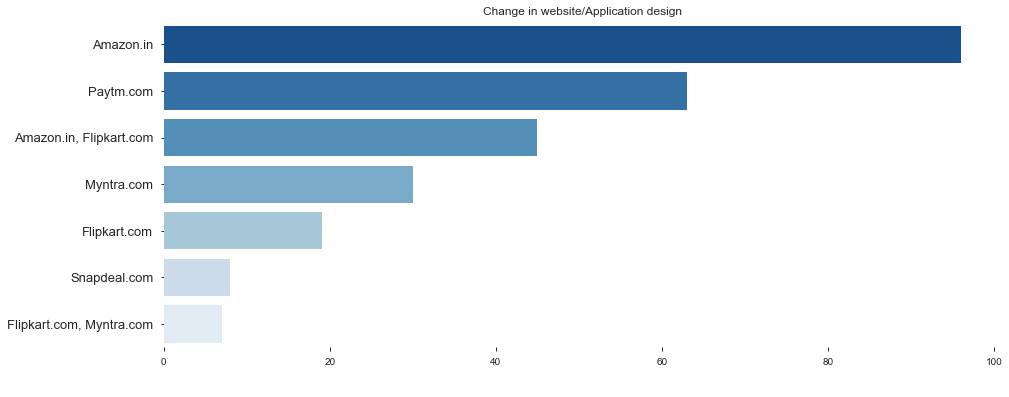

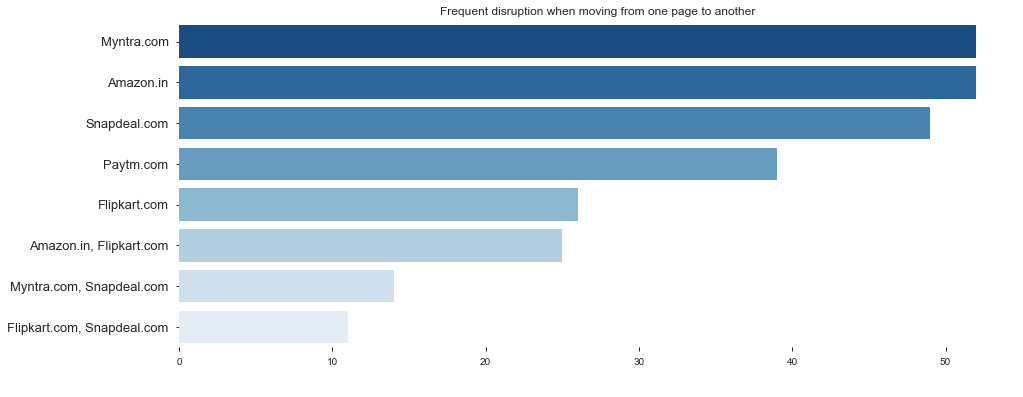

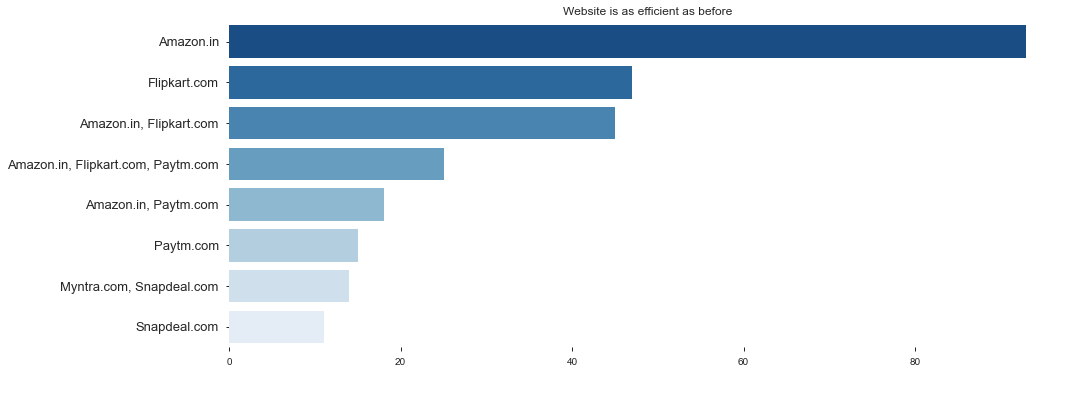

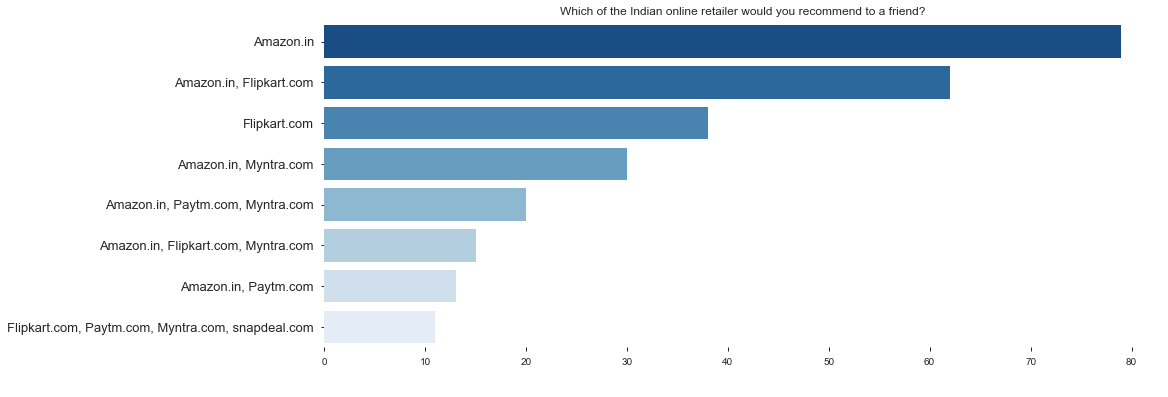

In [63]:
colunas = ['Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery ',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another',
       'Website is as efficient as before',
       'Which of the Indian online retailer would you recommend to a friend?']
for i in colunas:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = df[i][1:],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Blues_r')
  plt.title(i)
  plt.xlabel(' ', fontsize=20)
  plt.ylabel('')
  plt.yticks(fontsize=13)
  plt.box(False)

Ease of Use:
    All e-retailers seems to score well on this factor.

Visual Appeal & Web page layout:
    Amazon and Flipkart top the list when it comes to visual layout.

Variety of Products:
    Again, we have Amazon and Flipkart with highest points for offering a wide variety of options to consumers.

Complete, relevant description:
    Amazon and Flipkart seem to meet this requirement for most shoppers.
    
Fast loading website/app:
    Amazon leads the pack of ecommerce platforms for the speed of website and mobile app.
    
Reliability:
    Amazon is deemed the most reliable by shoppers when it comes to website and application usage.

Puchase Quickness:
    Amazon is again rated the best when it comes to quickness of purchase completion.
    
Payment options:
    Amazon and Flipkart rated highest for availablity of several payment options.

Speedy Order Delivery:
    Amazon has the quickest delivery as rated by shoppers.
    
Privacy of Customer Info:
    Customers deemed Amazon to have the highest privacy for customer information.
    
Security of Financial Info:
    Amazon again tops the list for this factor.
    
Trustworthiness:
    Amazon is rated the most by shoppers for being trustworthy.
    
Website Efficiency:
    Amazon website efficiency is confirmed to be as good as before.
    
Recommend to Friend:
    Amazon seems to be the online retailer most people would recommend to a friend.

# Conclusion:

With the analysis we have done so far, it is clear that customers will patronize ecommerce retailers that fulfill the below criteria:
  
    **Ease of Usage: 
    -a website and app that works seamlessly on mobile internet, the preferred choice of most shoppers
    -a website/app tailored for shopping on Smartphones and Windows OS users
    -optimised for usage on Google Chrome browser
    -user friendly interface
    -convenience and flexibility
    
    
    **Complete Descriptions:
    -since the average shopper spends around 15+ minutes before making a purchase decision, ensuring relevant, complete, easy to read/understand Product details as well as similar product details will help them make an informed decision, quicken time taken for product comparison. 
    -giving out information on listed seller will also help.
    -Displaying quality Information on the website improves satisfaction of customers
    
    
    **Fast loading websites:
    -ease of website or app navigation is a success factor.
    -quick loading and processing speed enhances customer experience and also make it enjoyable to explore the multitude of options.
    
    
    **Reliability:
     -trust that the online store will fulfill its part of the transaction at the stipulated time
    
    **Multiple Payment Options:
    -having multiple payment methods gives convenience for all kinds of customers
    -may reduce cart abandons due to payment method unavailability.
   
    
    
    **Delivery Speed:
    -Speedy order delivery 

    
    **Trustworthiness:
    -Being able to guarantee the privacy of the customer.
    -User satisfaction cannot exist without trust
    
    
    **Return/Replacement Options:
    -33 Return and replacement policy of the e-tailer is important for purchase decision
    
    
    **Competitive Pricing:
    -Keeping competitive pricing will enhance customer's trust in the e-retailer and also make sure customers do not abandon carts for better alternative offers from other sites.
    -Online shopping must give monetary benefit and discounts.
    -Gaining access to loyalty programs is a benefit of shopping online
    -Getting value for money spent
    
    
    
    **Customer Service:
    -Empathy (readiness to assist with queries) towards the customers
    -Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)

    